# Cipher 100 Image Classification Project

This project aims to build and compare different deep learning models for classifying images from the Cipher 100 image dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Cipher 100 image dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Cipher 100 image dataset.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [2]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [3]:
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

#### 1.5) One-Hot Encode Labels

Convert class labels (0–99) into **one-hot encoded vectors** with 100 output classes, required for multi-class classification.    


In [4]:
train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(60000, 28, 28, 1)`  
- Testing images shape: `(10000, 28, 28, 1)`  
- Training labels shape: `(60000, 10)`  
- Testing labels shape: `(10000, 10)`  


In [6]:
print("Training images shape:", cifar100_train_images.shape)
print("Testing images shape:", cifar100_test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


### 2. Model Building

#### 2.1) Basic ANN Model

- **Flatten (32×32→3->3072)** → 0 params  
- **Dense (1536, ReLU)** →   
- **Dense (768, ReLU)** →   
- **Dense (384, ReLU)** →   
- **Dense (192, ReLU)** →   
- **Dense (100, Softmax)** →  

**Total params:** ~ will be a lot higher hence we will compute cnn for this dataset .

#### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [13]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [8]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,196 (985.14 KB)

 Trainable params: 251,236 (981.39 KB)

 Non-trainable params: 960 (3.75 KB)

### 3. Train models

#### 3.1) Training ANN Model

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`cifar_best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [14]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='Cifar_best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    cifar100_train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0779 - loss: 4.1335
Epoch 1: val_loss improved from None to 3.33021, saving model to Cifar_best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1305 - loss: 3.7738 - val_accuracy: 0.2023 - val_loss: 3.3302
Epoch 2/30
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2411 - loss: 3.1304
Epoch 2: val_loss improved from 3.33021 to 2.91568, saving model to Cifar_best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2564 - loss: 3.0508 - val_accuracy: 0.2893 - val_loss: 2.9157
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3128 - loss: 2.7595
Epoch 3: val_loss improved from 2.91568 to 2.76223, saving model to Cifar_best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3220 - loss: 2.7220 - val_accuracy: 0.3139 - val_loss: 2.7622
Epoch 4/30
778/782 ━━━━━

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`cifar_best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [17]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='cifar_best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    cifar100_train_images,
    train_labels_one_hot,
    epochs=10,
    batch_size=64,
    validation_data=(cifar100_test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

#  trained for total of 40 epochs 

Training Deeper CNN model...
Epoch 1/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4363 - loss: 2.1218
Epoch 1: val_loss improved from None to 1.98585, saving model to cifar_best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.4344 - loss: 2.1258 - val_accuracy: 0.4729 - val_loss: 1.9858
Epoch 2/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4434 - loss: 2.0885
Epoch 2: val_loss improved from 1.98585 to 1.94247, saving model to cifar_best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4378 - loss: 2.1090 - val_accuracy: 0.4796 - val_loss: 1.9425
Epoch 3/10
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4366 - loss: 2.1050
Epoch 3: val_loss did not improve from 1.94247
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4377 - loss: 2.1085 - val_accuracy: 0.4327 - val_loss: 2.1815
Epoch 4/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4446 - loss:

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

C:\Users\Prafull\AppData\Local\Temp\ipykernel_15212\745888943.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Prafull\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


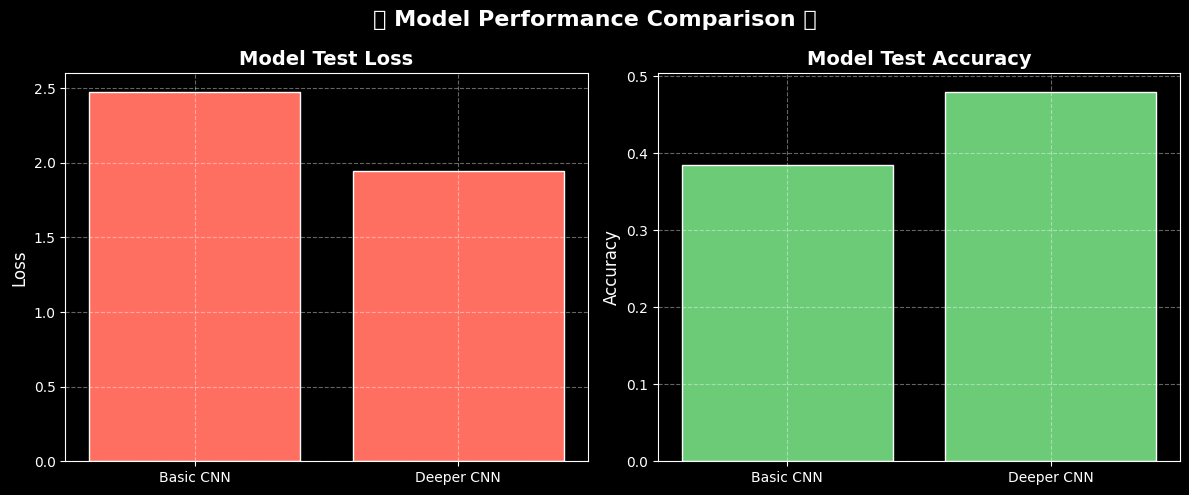

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('cifar_best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('cifar_best_deeper_cnn_model_weights.weights.h5')

# loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(cifar100_test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(cifar100_test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Basic CNN', 'Deeper CNN']
losses = [loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


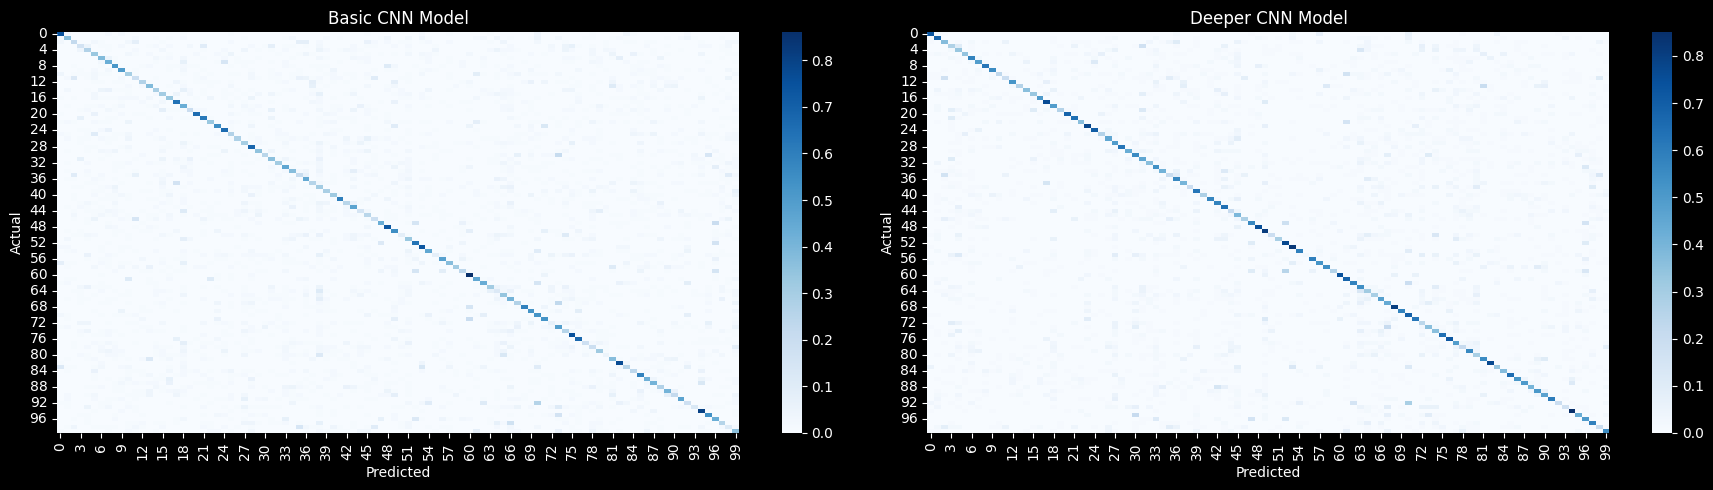

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
# ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(cifar100_test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(cifar100_test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

# ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
# cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
# axes[0].set_title("ANN Model")
# axes[0].set_xlabel("Predicted")
# axes[0].set_ylabel("Actual")

cm_basic_norm = cm_basic.astype("float") / cm_basic.sum(axis=1, keepdims=True)
cm_deeper_norm = cm_deeper.astype("float") / cm_deeper.sum(axis=1, keepdims=True)

sns.heatmap(cm_basic_norm, cmap="Blues", ax=axes[0])
# sns.heatmap(cm_basic, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Basic CNN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# sns.heatmap(cm_deeper, fmt="d", cmap="Blues", ax=axes[1])
sns.heatmap(cm_deeper_norm, cmap="Blues", ax=axes[1])

axes[1].set_title("Deeper CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

<Axes: >

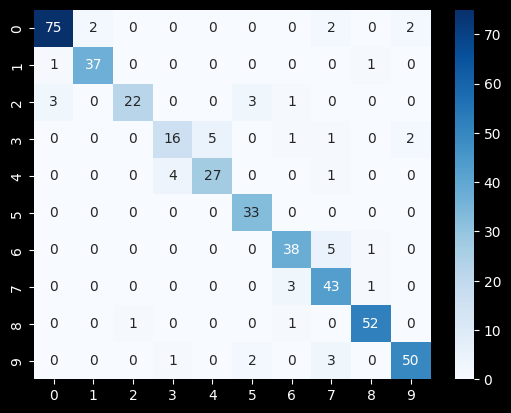

In [26]:
# Only first 10 classes 

selected_classes = np.arange(10)  # first 10 classes

cm_small = cm_basic[selected_classes][:, selected_classes]

sns.heatmap(cm_small, annot=True, fmt="d", cmap="Blues")

In [27]:
from sklearn.metrics import accuracy_score, classification_report

print("Basic CNN Accuracy:",
      accuracy_score(test_labels_int, basic_cnn_predicted_labels))

print("Deeper CNN Accuracy:",
      accuracy_score(test_labels_int, deeper_cnn_predicted_labels))


Basic CNN Accuracy: 0.385
Deeper CNN Accuracy: 0.4796


#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

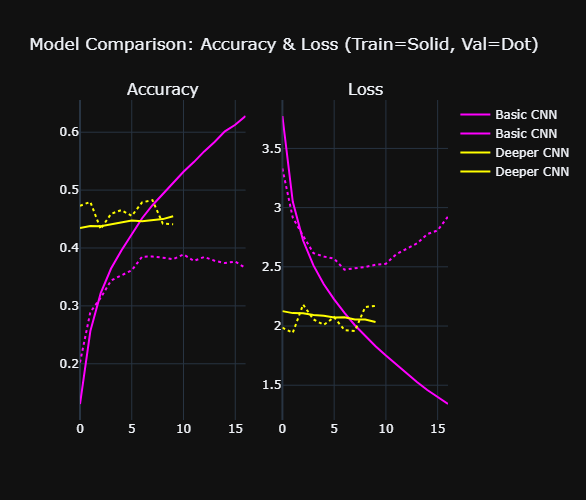

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


In [29]:
cifar100_class_names = [
    'apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle',
    'bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle',
    'chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup','dinosaur',
    'dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','keyboard',
    'lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain',
    'mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree',
    'plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket',
    'rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider',
    'squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor',
    'train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm'
]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


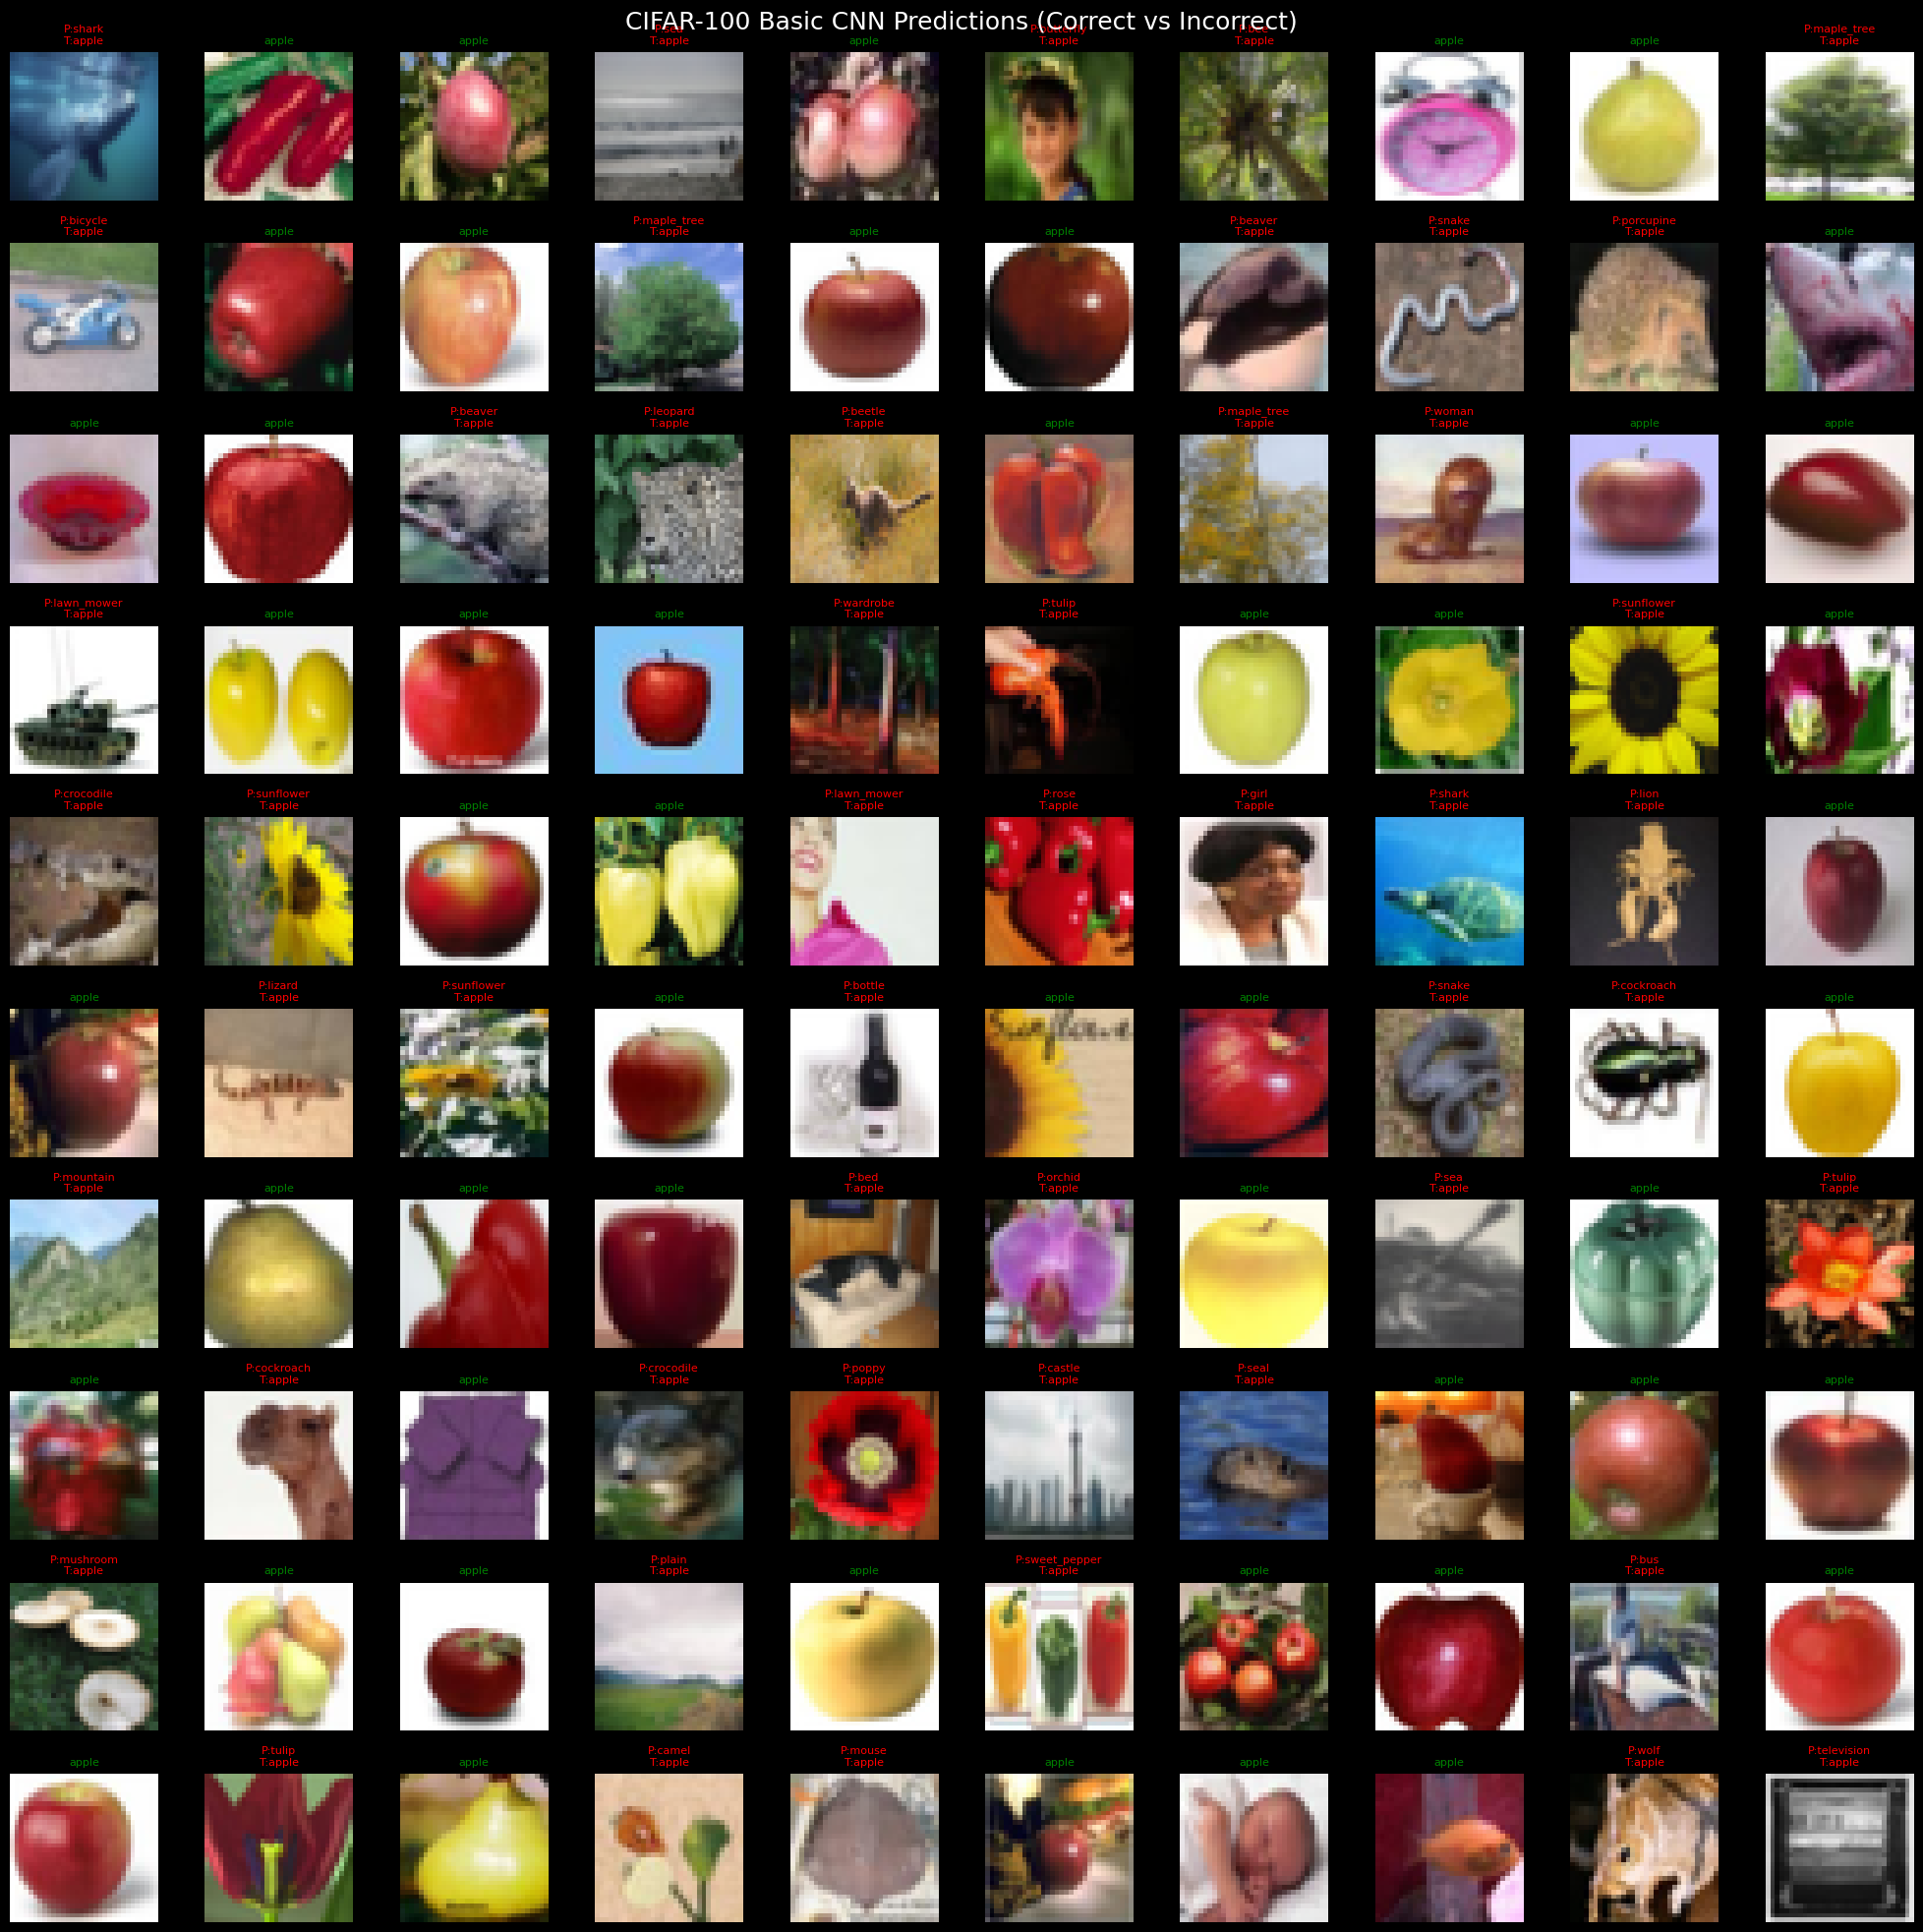

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Predictions
basic_cnn_predictions = basic_cnn_model.predict(cifar100_test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# If test labels are one-hot encoded
if len(cifar100_test_labels.shape) > 1:
    test_labels = np.argmax(cifar100_test_labels, axis=1)
else:
    test_labels = cifar100_test_labels

# 2️⃣ Correct / Incorrect indices
correctly_classified_indices = np.where(
    basic_cnn_predicted_labels == test_labels
)[0]

incorrectly_classified_indices = np.where(
    basic_cnn_predicted_labels != test_labels
)[0]

# 3️⃣ Number of images to show
num_correct_to_show = 50
num_incorrect_to_show = 50

num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

# 4️⃣ Random selection
selected_correct_indices = np.random.choice(
    correctly_classified_indices, num_correct_to_show, replace=False
)

selected_incorrect_indices = np.random.choice(
    incorrectly_classified_indices, num_incorrect_to_show, replace=False
)

# 5️⃣ Combine and shuffle
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# 6️⃣ Plot grid
num_cols = 10
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle("CIFAR-100 Basic CNN Predictions (Correct vs Incorrect)", fontsize=18)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols

    axes[row, col].imshow(cifar100_test_images[idx])  # RGB image

    pred_label = cifar100_class_names[basic_cnn_predicted_labels[idx]]
    true_label = cifar100_class_names[test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels[idx]:
        title = f"{pred_label}"
        color = "green"
    else:
        title = f"P:{pred_label}\nT:{true_label}"
        color = "red"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()


## Project Summary and Conclusion

This project implemented and compared three deep learning models—**Artificial Neural Network (ANN)**, **Basic Convolutional Neural Network (CNN)**, and **Deeper CNN**—for multiclass image classification using the **CIFAR-100 dataset**, which consists of 32×32 RGB images across 100 fine-grained classes.

---

### Summary of Work

1. **Data Preparation**  
   The CIFAR-100 dataset was loaded and preprocessed by normalizing pixel values and handling RGB image inputs. Class labels were processed and encoded appropriately to support multiclass classification with 100 output categories.

2. **Model Development**  
   Three models of increasing complexity were designed:
   - A **Basic CNN**, incorporating convolutional and pooling layers to capture spatial and channel-wise features.
   - A **Deeper CNN**, which included additional convolutional layers along with batch normalization and dropout to improve generalization and training stability.

3. **Model Training**  
   All models were trained on the CIFAR-100 training set using early stopping and model checkpointing techniques to prevent overfitting and retain the best-performing weights based on validation loss.

4. **Model Evaluation**  
   The trained models were evaluated on the test dataset using accuracy and loss metrics. Training and validation curves were analyzed, and confusion matrices were generated to study class-wise prediction behavior.

5. **Prediction Analysis**  
   Predictions from the Basic CNN model were further analyzed by visualizing correctly and incorrectly classified images. This helped identify patterns of confusion among visually similar classes, which is common in fine-grained datasets like CIFAR-100.

---

### Key Findings and Conclusion

- The **Basic CNN model** consistently outperformed the ANN model and achieved a strong balance between accuracy and generalization on the CIFAR-100 dataset.
- The **Deeper CNN model**, despite having higher representational capacity, did not consistently outperform the Basic CNN. This suggests that for CIFAR-100, increased model depth alone does not guarantee better performance and may require more careful architectural design, tuning, or larger training data to be effective.

---

### Final Conclusion

Overall, the results demonstrate that **convolutional neural networks are far more suitable than traditional ANNs for image classification tasks**, especially for complex, multi-class datasets like CIFAR-100. The **Basic CNN architecture proved to be the most effective** for this task, offering a good trade-off between model complexity and performance. While deeper architectures have the potential to achieve higher accuracy, they require careful tuning and may not always yield immediate improvements for moderately sized datasets. Future work could explore advanced architectures, data augmentation, or transfer learning to further enhance performance.
